# Homework 6  - Logistic Regression without using any libraries.

## Your Name Here

Student Name:

Student UT EID:

---

Partner Name:

Partner UT EID:

---

Date Created:

Date Last Modified:

---

Totoal Points 20.



In [79]:
# Standard Headers
# You are welcome to add additional headers here if you wish
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Enable inline mode for matplotlib so that Jupyter displays graphs
%matplotlib inline

# Your allowed to use only the above libraries that are imported. No other libs should be used in this assignment.

## Heart Dataset

In this Assignment we will work with some patients dataset.

We have access to 303 patients data. The features are listed below.

In [80]:
# Your code here
heart_df = pd.read_csv("Heart.csv")
heart_df

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,Target
0,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,typical,110,264,0,0,132,0,1.2,2,0.0,reversable,Yes
299,68,1,asymptomatic,144,193,1,0,141,0,3.4,2,2.0,reversable,Yes
300,57,1,asymptomatic,130,131,0,0,115,1,1.2,2,1.0,reversable,Yes
301,57,0,nontypical,130,236,0,2,174,0,0.0,2,1.0,normal,Yes


**Age:** The person’s age in years

**Sex:** The person’s sex (1 = male, 0 = female)

**ChestPain:** chest pain type

* Value 0: asymptomatic
* Value 1: atypical angina
* Value 2: non-anginal pain
* Value 3: typical angina

**RestBP:** The person’s resting blood pressure (mm Hg on admission to the hospital)

**Chol:** The person’s cholesterol measurement in mg/dl

**Fbs:** The person’s fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)
restecg: resting electrocardiographic results

* Value 0: showing probable or definite left ventricular hypertrophy by Estes’ criteria
* Value 1: normal
* Value 2: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)

**RestECG:** The person’s maximum heart rate achieved

**MaxHR:** Exercise induced angina (1 = yes; 0 = no)

**Oldpeak:** ST depression induced by exercise relative to rest (‘ST’ relates to positions on the ECG plot. See more here)

**Slope:** the slope of the peak exercise ST segment — 0: downsloping; 1: flat; 2: upsloping

* 0: downsloping;
* 1: flat;
* 2: upsloping

**Ca:** The number of major vessels (0–3)

**Thal:** A blood disorder called thalassemia Value 0: NULL (dropped from the dataset previously

* Value 1: fixed defect (no blood flow in some part of the heart)
* Value 2: normal blood flow
* Value 3: reversible defect (a blood flow is observed but it is not normal)

**Target:** Heart disease (1 = no, 0= yes)

# Task 1 - (4 points)
We want to use logistic regerssion to predict if a patient will have heart problems or not. The column "Target" in our datasets includes data about heart disease. If the patient had heart disease, the patient's "Target" value equals 1. Otherwise, "Target" equals 0.

Prepare your data set for predicting heart disease ("Target" column) by using 3 features:

* Age of the patient (Column **"Age"**)
* Gender of the patient (male or female - Column **"Sex"**)
* Cholestrol level of the patient (Column **"Chol"**)

Split your data into 80% traning data and 20% test data ***without*** using any libraries other than the ones imported above. You must do it manually.

* Do a maximum of **100 iterations**
* Use a very small learning rate for checking your GD implementation.
* Your are allowed to use your choice of learning rate, like using 0.0001, 0.001 or 0.01 or 0.1 or higher/lower.
* **Visualize your error/costs over the iterations with a plot**.
* No need to add an y-intercept in this task.

(**4 points** - 3 points for code, 1 point for cost visualization)

In [81]:
# Add your code Here!
df = heart_df.copy()
df = df[['Target', 'Age', 'Sex', 'Chol']]
df['Target'] = df['Target'].map({'No': 1, 'Yes': 0})
df

,Target,Age,Sex,Chol
0,1,63,1,233
1,0,67,1,286
2,0,67,1,229
3,1,37,1,250
4,1,41,0,204
...,...,...,...,...
298,0,45,1,264
299,0,68,1,193
300,0,57,1,131
301,0,57,0,236


In [82]:
randomized = df.sample(frac=1).reset_index(drop=True)
training=randomized[:int(0.8 * len(df))]
testing = randomized[int(0.8 * len(df)):]
training_x, training_y = training[['Age','Sex','Chol']], training['Target']
testing_x, testing_y = testing[['Age','Sex','Chol']], testing['Target']

In [83]:
def sigmoid(z):
    g = 1 / (1 + np.exp(-z))
    return g

In [84]:
def cost_function(X, y, weights):
    m, n = X.shape
    x_dot_weights = X.dot(weights)

    cost = (1.0 / m) * (-y.T.dot(np.log(sigmoid(x_dot_weights))) - (1 - y).T.dot(np.log(1 - sigmoid(x_dot_weights))))

    return cost

In [86]:
def gradient(X, y, weights):
    m, n = X.shape
    x_dot_weights = X.dot(weights)

    grad = (1.0 / m )* (sigmoid(x_dot_weights) - y).T.dot(X)

    return grad

In [87]:
weights = np.zeros(3)
num_iterations = 100
learnin_rate = 0.00001

cost_list = []

for i in range(0, num_iterations):

    cost = cost_function(training_x, training_y, weights)
    #print("Cost is: ", cost)
    cost_list.append(cost)

    grad = gradient(training_x, training_y, weights)

    weights = weights - learnin_rate * grad

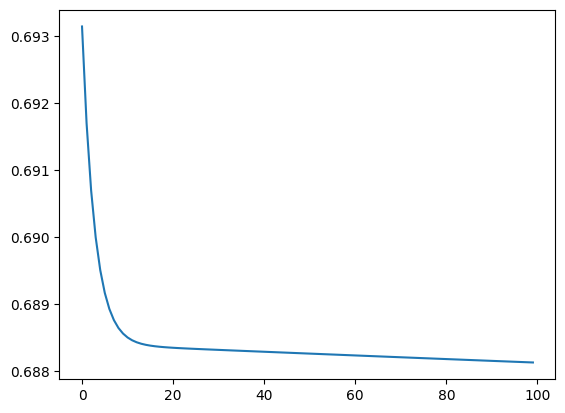

In [88]:
plt.plot(np.arange(num_iterations), cost_list)
plt.show()

# Task 2 - (4 points)

Cacluate the Accuracy, Precision, Recall and F1 score of your logistic regression implementaion on the testing set.
Print the results.

You may use equations shown in lecture/slides/examples.

Calcuate the accuracy, precision, recall and F1 score of your logistic regression implementaion on the testing set.
Print the results. (**4 points**)


In [89]:
def predict(weights, X):
    p = sigmoid(X.dot(weights)) >= 0.5
    return p.astype(int)

In [90]:
# Add your code Here!
predictions = np.array(predict(weights, testing_x))
testing_y=np.array(testing_y)
correct = np.sum(predictions == testing_y)
print("Accuracy is",correct/testing_y.size)
truePos = np.sum((predictions == 1) & (testing_y == 1))
falsePos = np.sum((predictions == 1) & (testing_y == 0))
falseNeg = np.sum((predictions==0)& (testing_y==1))
print("Precision is",truePos/(truePos+falsePos))
print("Recall is", truePos/(truePos+falseNeg) )
prec=truePos/(truePos+falsePos)
recall=truePos/(truePos+falseNeg)
print("F1 score is", (2*(prec*recall))/(prec+recall))

Accuracy is 0.47540983606557374
Precision is 0.47540983606557374
Recall is 1.0
F1 score is 0.6444444444444445


# Task 3 - (4 points)

Add a y-intercept and repeat the above tasks. Do you see any differences after adding the y-intercept?

(4 points - 2 for code, 1 for cost visualizaiton, 1 for description.)

In [91]:
def gradientB(X, y, weights,b):
    m, n = X.shape
    x_dot_weights = X.dot(weights)

    gradCoef= (1.0 / m )* (sigmoid(x_dot_weights + b) - y).T.dot(X)
    gradB = (1/m)* (np.sum(sigmoid(x_dot_weights+b)-y))

    return gradCoef, gradB

In [92]:
# Add your code Here!
new_weights = np.zeros(3)
num_iterations = 100
learnin_rate = 0.00001
b=0

cost_list = []

for i in range(0, num_iterations):

    cost = cost_function(training_x, training_y, weights)
    #print("Cost is: ", cost)
    cost_list.append(cost)

    gradCoef, gradB = gradientB(training_x, training_y, weights, b)

    new_weights = weights - learnin_rate * gradCoef
    b=b-learnin_rate*gradB


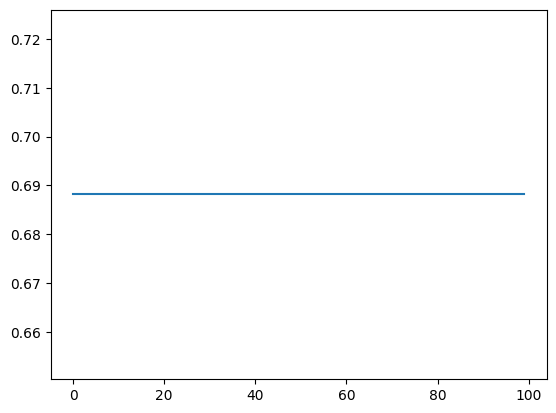

In [93]:
plt.plot(np.arange(num_iterations), cost_list)
plt.show()

In [94]:
def predictB(weights, X,b):
    p = sigmoid((X.dot(weights))+b) >= 0.5
    return p.astype(int)

In [95]:
predictions = np.array(predictB(weights, testing_x,b))
testing_y=np.array(testing_y)
correct = np.sum(predictions == testing_y)
print("Accuracy is",correct/testing_y.size)
truePos = np.sum((predictions == 1) & (testing_y == 1))
falsePos = np.sum((predictions == 1) & (testing_y == 0))
falseNeg = np.sum((predictions==0)& (testing_y==1))
print("Precision is",truePos/(truePos+falsePos))
print("Recall is", truePos/(truePos+falseNeg) )
prec=truePos/(truePos+falsePos)
recall=truePos/(truePos+falseNeg)
print("F1 score is", (2*(prec*recall))/(prec+recall))

Accuracy is 0.47540983606557374
Precision is 0.47540983606557374
Recall is 1.0
F1 score is 0.6444444444444445


# Task 4 - Implement the Bold Driver   - (4 points)

Implement the bold driver into your gradient descent implementation, which lets us have a dynamic learning rate. Visualize the costs and print the accuracy/etc. metrics as before. Do not use a y-intercept this time.

Add a stop condition that stop the GD when the cost is not changing more than 0.001 between iterations.
Describe the results. Did you stop earlier than 100 iterations?
(4 points - 2 for code, 1 for cost visualizaiton, 1 for description.)



In [ ]:
# Add your code Here!

# Task 5 - Implement the L2 norm regularization.  - (4 points)



Modify your Cost and gradient to implement the l2 norm regularization. Repeat the steps taken in prior tasks and describe your result.

 * Use a y-intercept.
 * Do a maximum of 100 iterations as before and report your accuracy, precision, recall and F1 score.
 * Optional: You can stop earlier, if the cost is not changing more than 0.001 between iterations.
 * Optional: You can use the bold driver, if you want. But a bold driver is not required to perform L2 norm regularizaiton.

(4 points - 2 for code, 1 for cost visualizaiton, 1 for description.)

In [ ]:
# Add your code Here!